# Chapter 1: EDA + T-tests

## Importing Data and Packages

In [1]:
#some useful packages for analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.stats.api as sms

import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here we're adding any support functions needed for any step of our analysis.

In [2]:
#This code is for calculating Welch's T-test. It will print the p-value as well as degrees of freedom and the test statistic as well
#Source: https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/

def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.5f}", "\n",
          f"p-value = {p:.5f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.5f}")

In [3]:
url = 'https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv'
dataset_ANS = pd.read_csv(url)

In [4]:
dataset_ANS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [5]:
dataset_ANS.nunique()

Arrest_Year                            2
Arrest_Month                           4
EventID                            60003
ArrestID                           64805
PersonID                           37347
Perceived_Race                         8
Sex                                    3
Age_group__at_arrest_                  9
Youth_at_arrest__under_18_years        3
ArrestLocDiv                          18
StripSearch                            2
Booked                                 2
Occurrence_Category                   31
Actions_at_arrest___Concealed_i        2
Actions_at_arrest___Combative__        2
Actions_at_arrest___Resisted__d        2
Actions_at_arrest___Mental_inst        2
Actions_at_arrest___Assaulted_o        2
Actions_at_arrest___Cooperative        2
SearchReason_CauseInjury               2
SearchReason_AssistEscape              2
SearchReason_PossessWeapons            2
SearchReason_PossessEvidence           2
ItemsFound                             2
ObjectId        

In [6]:
dataset_ANS.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

## Cleaning the Data


In [7]:
#copy original data
clean_dataset_ANS = dataset_ANS.copy()

In [8]:
#Drop a few unrelated columns based on the research questions
clean_dataset_ANS = clean_dataset_ANS.drop (columns=['Arrest_Year', 'EventID', 
                                                     'Youth_at_arrest__under_18_years',
                                                     'ArrestLocDiv', 'Booked', 'SearchReason_CauseInjury',
                                                     'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
                                                     'SearchReason_PossessEvidence', 'ObjectId'
                                                     ])


In [9]:
#simplify age group
clean_dataset_ANS = (clean_dataset_ANS.replace(to_replace = ["Aged 17 years and under",
                                                             "Aged 17 years and younger",
                                                             "Aged 18 to 24 years",
                                                             "Aged 25 to 34 years",
                                                             "Aged 35 to 44 years",
                                                             "Aged 45 to 54 years",
                                                              "Aged 55 to 64 years",
                                                             "Aged 65 and older",
                                                             "Aged 65 years and older"], 
                                               value=["<=17",
                                                      "<=17",
                                                      "18-24",
                                                      "25-34",
                                                      "35-44",
                                                      "45-54",
                                                      "55-64",
                                                      ">=64",
                                                      ">=64"]))

In [10]:
#Simplify column names
clean_dataset_ANS.columns = clean_dataset_ANS.columns.str.replace('Actions_at_arrest___', '').str.replace('Age_group__at_arrest_', 'Age_arrest').str.replace('Occurrence_Category','Occurrence').str.replace('Combative__','Combative')


In [11]:
clean_dataset_ANS.nunique()

Arrest_Month          4
ArrestID          64805
PersonID          37347
Perceived_Race        8
Sex                   3
Age_arrest            7
StripSearch           2
Occurrence           31
Concealed_i           2
Combative             2
Resisted__d           2
Mental_inst           2
Assaulted_o           2
Cooperative           2
ItemsFound            2
dtype: int64

In [12]:
clean_dataset_ANS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Arrest_Month    65276 non-null  object 
 1   ArrestID        64807 non-null  float64
 2   PersonID        65276 non-null  int64  
 3   Perceived_Race  65272 non-null  object 
 4   Sex             65276 non-null  object 
 5   Age_arrest      65252 non-null  object 
 6   StripSearch     65276 non-null  int64  
 7   Occurrence      65111 non-null  object 
 8   Concealed_i     65276 non-null  int64  
 9   Combative       65276 non-null  int64  
 10  Resisted__d     65276 non-null  int64  
 11  Mental_inst     65276 non-null  int64  
 12  Assaulted_o     65276 non-null  int64  
 13  Cooperative     65276 non-null  int64  
 14  ItemsFound      7801 non-null   float64
dtypes: float64(2), int64(8), object(5)
memory usage: 7.5+ MB


In [13]:
clean_dataset_ANS.isnull().sum()

Arrest_Month          0
ArrestID            469
PersonID              0
Perceived_Race        4
Sex                   0
Age_arrest           24
StripSearch           0
Occurrence          165
Concealed_i           0
Combative             0
Resisted__d           0
Mental_inst           0
Assaulted_o           0
Cooperative           0
ItemsFound        57475
dtype: int64

## Exploratory Data Analysis

In [14]:
clean_dataset_ANS.head(20)

,Arrest_Month,ArrestID,PersonID,Perceived_Race,Sex,Age_arrest,StripSearch,Occurrence,Concealed_i,Combative,Resisted__d,Mental_inst,Assaulted_o,Cooperative,ItemsFound
0,July-Sept,6017884.0,326622,White,M,35-44,0,Assault & Other crimes against persons,0,0,0,0,0,1,NaN
1,July-Sept,6056669.0,326622,White,M,35-44,0,Assault & Other crimes against persons,0,0,0,0,0,0,NaN
2,Oct-Dec,6057065.0,326622,Unknown or Legacy,M,35-44,0,Assault & Other crimes against persons,0,0,0,0,0,0,NaN
3,Jan-Mar,6029059.0,327535,Black,M,25-34,0,Harassment/Threatening,0,0,0,0,0,0,NaN
4,Jan-Mar,6040372.0,327535,South Asian,M,25-34,0,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN
5,Apr-June,6060688.0,327535,South Asian,M,25-34,0,Assault,0,0,0,0,0,1,NaN
6,Jan-Mar,6053833.0,330778,Black,M,25-34,0,Assault,0,0,0,0,0,0,NaN
7,Jan-Mar,6063477.0,330778,Black,M,25-34,0,Robbery/Theft,0,0,0,0,0,1,NaN
8,Jan-Mar,6053929.0,330778,Black,M,25-34,0,Robbery/Theft,0,0,0,0,0,1,NaN
9,Apr-June,6004570.0,330778,Black,M,25-34,0,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN


In [15]:
# set order for figure standarlization
age_order= ["<=17",
                                                      "18-24",
                                                      "25-34",
                                                      "35-44",
                                                      "45-54",
                                                      "55-64",
                                                      ">=64"]
month_order = ['Jan-Mar','Apr-June','July-Sept','Oct-Dec']

In [16]:
#filter strip search data
filtered_Stripsearch = clean_dataset_ANS[clean_dataset_ANS['StripSearch'] == 1]

## Visual EDA


Maximum number of times a person can get arrested: 54
Mean number of arrests per person: 1.7478244571183763


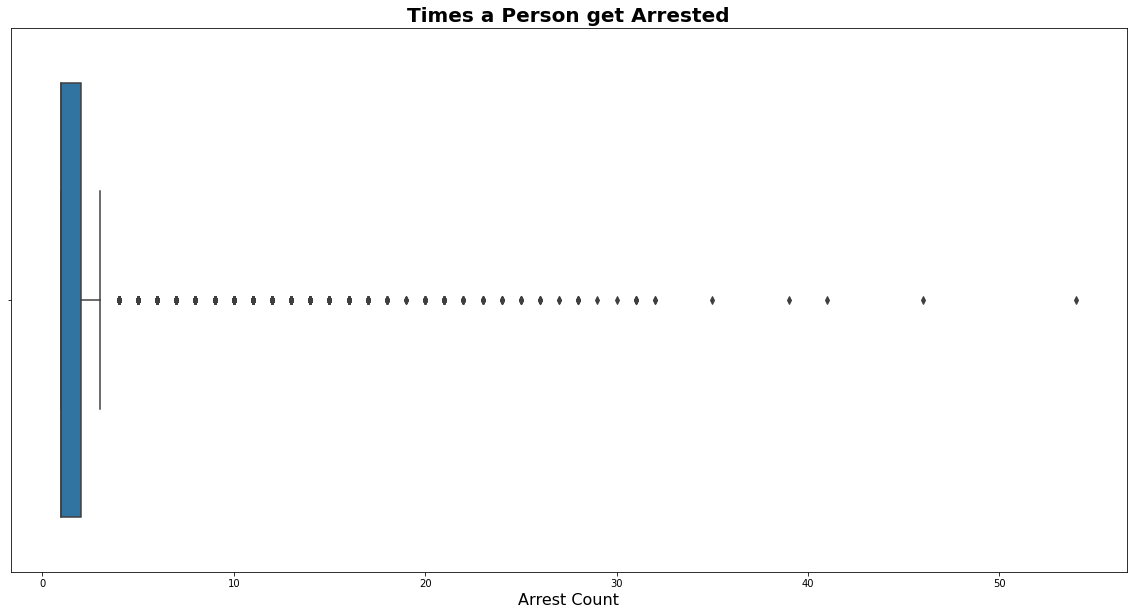

In [17]:
#Check individual arrest times
arrest_count = clean_dataset_ANS['PersonID'].value_counts()
max_arrests = arrest_count.max()
print("Maximum number of times a person can get arrested:", max_arrests)

mean_arrests = np.mean(arrest_count)
print("Mean number of arrests per person:", mean_arrests)

fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=arrest_count,ax=ax).set(title='Times a Person get Arrested')
plt.xlabel('Arrest Count')

for ax in fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_title(ax.get_title(), fontsize=20, fontweight='bold')

plt.show()

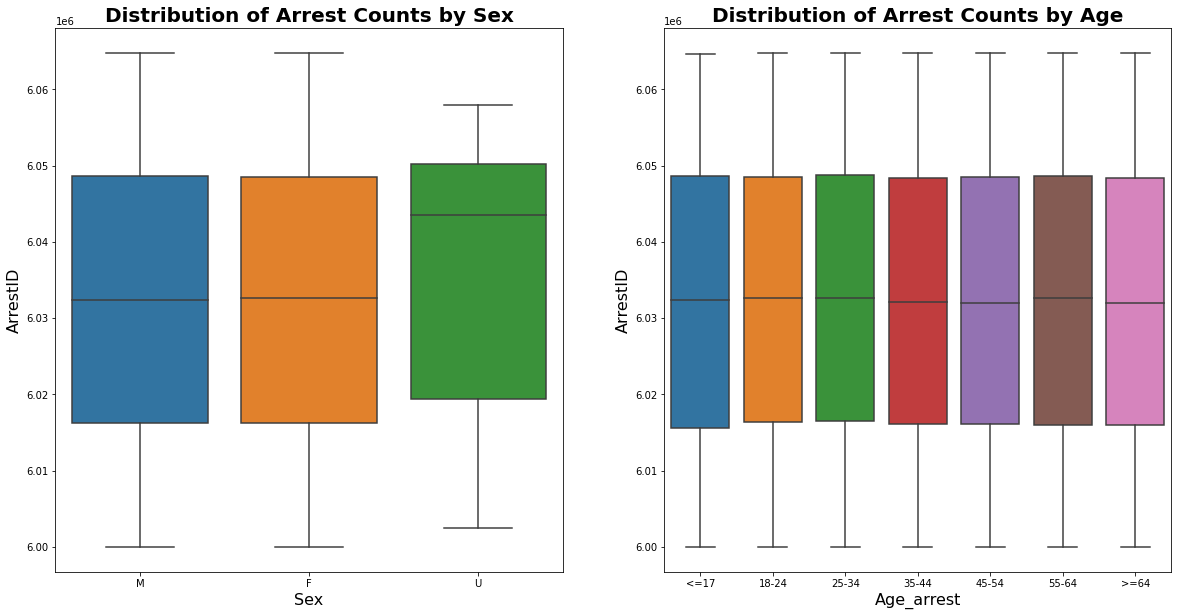

In [18]:
#compare gender with arrest
fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.boxplot(x='Sex', y='ArrestID', data=clean_dataset_ANS, ax=ax[0]).set(title='Distribution of Arrest Counts by Sex')
sns.boxplot(x='Age_arrest', y='ArrestID', data=clean_dataset_ANS, order=age_order, ax=ax[1]).set(title='Distribution of Arrest Counts by Age')

for ax in fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_title(ax.get_title(), fontsize=20, fontweight='bold')

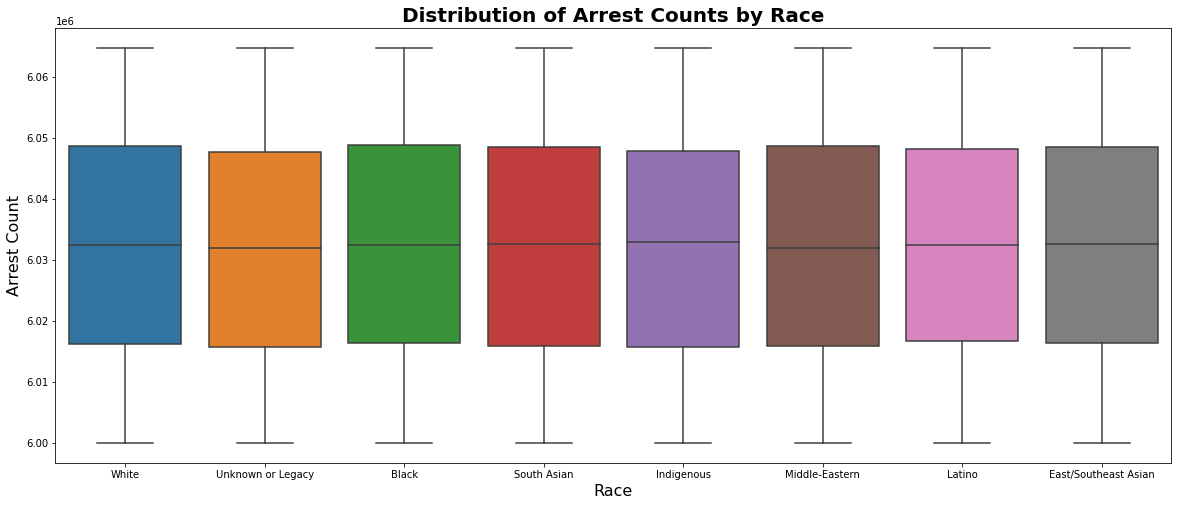

In [19]:
#compare race 
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x='Perceived_Race', y='ArrestID', data=clean_dataset_ANS, ax=ax)
plt.title('Distribution of Arrest Counts by Race')
plt.xlabel('Race')
plt.ylabel('Arrest Count')

for ax in fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_title(ax.get_title(), fontsize=20, fontweight='bold')
    
plt.show()

### Count of Arrests

Text(0.5, 1.0, 'Number of Arrests by Race')

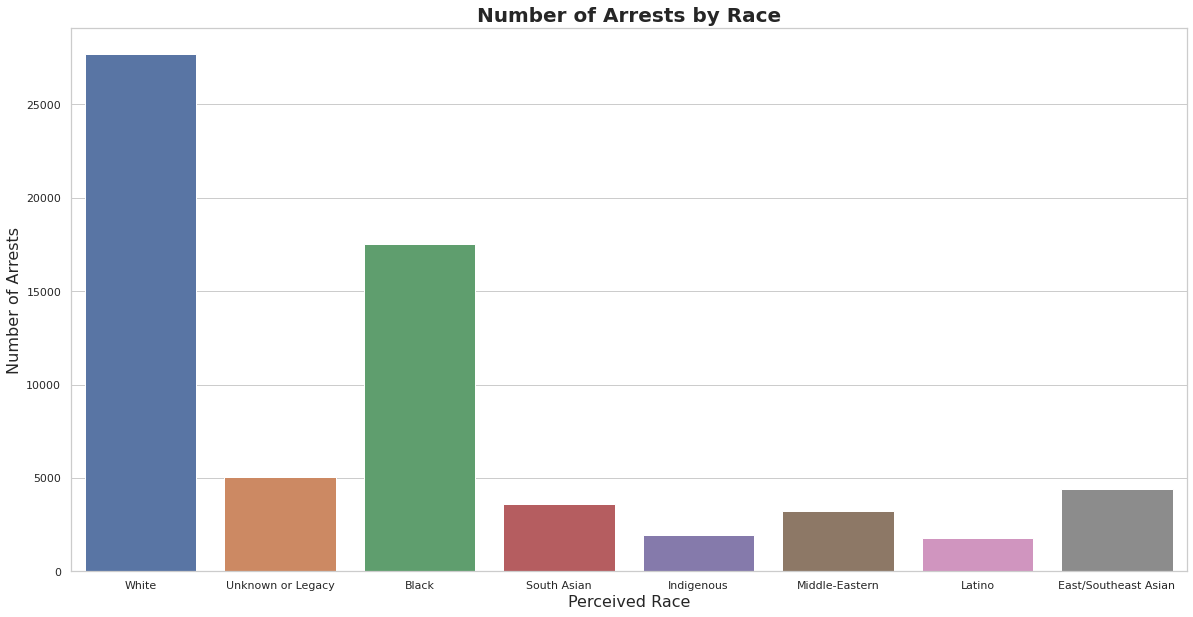

In [20]:
# arrest trimes vs race
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots (figsize=[20,10])
sns.countplot(x='Perceived_Race', data=clean_dataset_ANS, ax=ax).set(title='Number of Arrested by Race')
ax.set_xlabel('Perceived Race', fontsize=16)
ax.set_ylabel('Number of Arrests', fontsize=16)
ax.set_title('Number of Arrests by Race', fontsize=20, fontweight='bold')

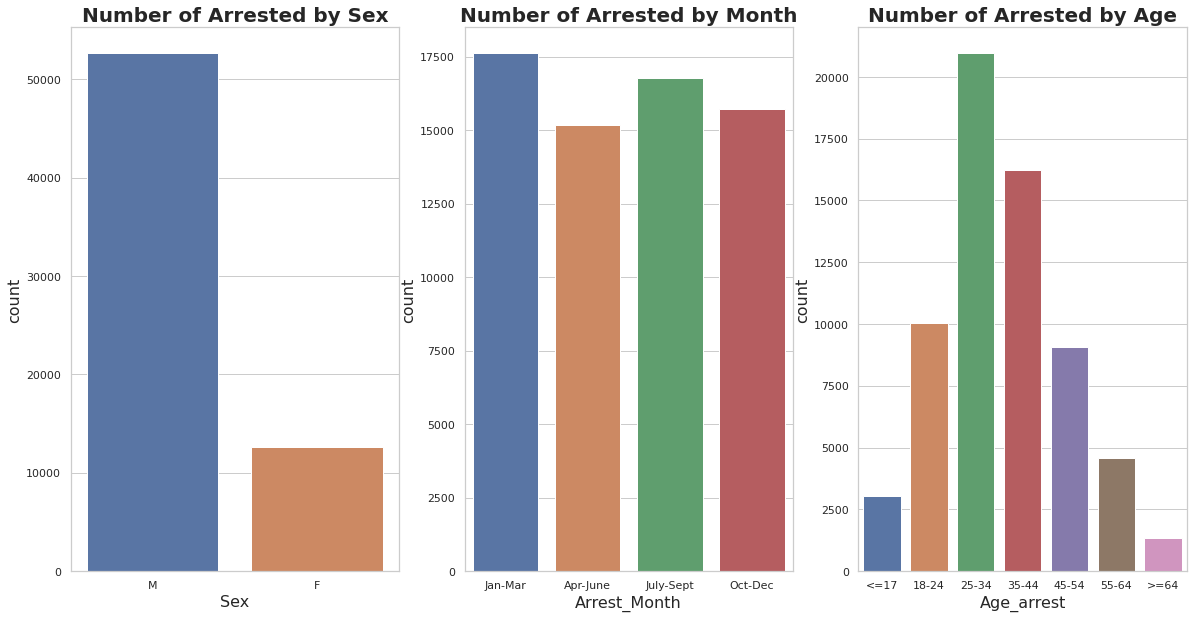

In [21]:
#Sex & Month & Age vs Count arrest
#figure
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots (1,3, figsize=[20,10])
sns.countplot(x='Sex', data=clean_dataset_ANS, order=['M','F'], ax=ax[0]).set(title='Number of Arrested by Sex')
sns.countplot(x='Arrest_Month', data=clean_dataset_ANS, order=month_order, ax=ax[1]).set(title='Number of Arrested by Month')
sns.countplot(data=clean_dataset_ANS, x='Age_arrest', order=age_order, ax=ax[2]).set(title='Number of Arrested by Age')

for ax in fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_title(ax.get_title(), fontsize=20, fontweight='bold')

[Text(0.5, 1.0, 'Number of Strip Search Conducted in the Top 5 Occurrence')]

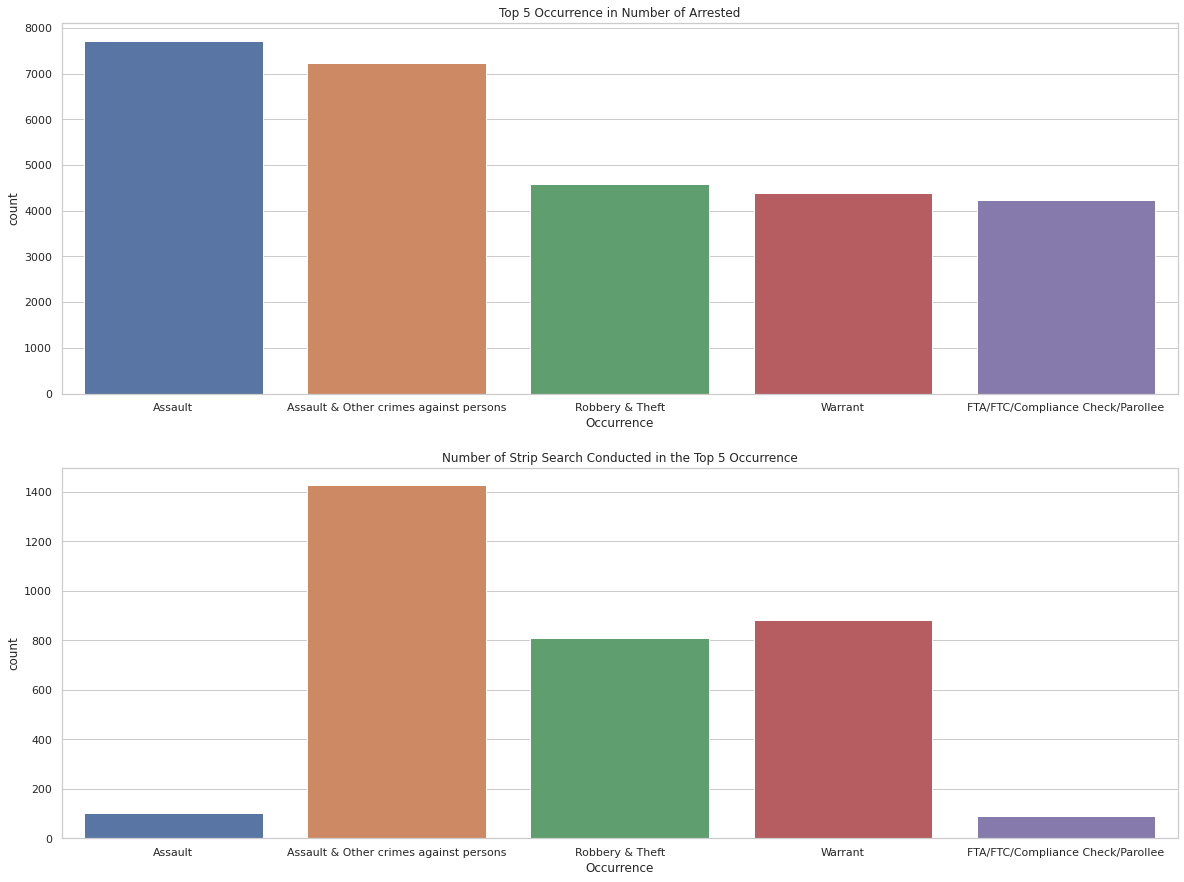

In [22]:
#Occurrence vs Count arrest & Strip search
#count occurrence values
occurrence_count = clean_dataset_ANS['Occurrence'].value_counts()
occurrence_order = occurrence_count.nlargest(5).index.tolist()
#filter occurrence to check top 5 in arrest
filtered_occurrence = occurrence_count.nlargest(5)
filtered_occurrence_dataset = clean_dataset_ANS[clean_dataset_ANS['Occurrence'].isin(filtered_occurrence.index)]
#filter occurrence to check top 5 in strip search
filtered_occurrence_stripsearch_dataset = filtered_Stripsearch[filtered_Stripsearch['Occurrence'].isin(filtered_occurrence.index)]
#figure
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(2,1, figsize=[20,15])
sns.countplot(data=filtered_occurrence_dataset, x='Occurrence', order=occurrence_order, ax=ax[0]).set(title='Top 5 Occurrence in Number of Arrested')
sns.countplot(data=filtered_occurrence_stripsearch_dataset, x='Occurrence', order=occurrence_order, ax=ax[1]).set(title='Number of Strip Search Conducted in the Top 5 Occurrence')


[Text(0.5, 1.0, 'Top 5 Occurrence in Number of Arrested for Black Race')]

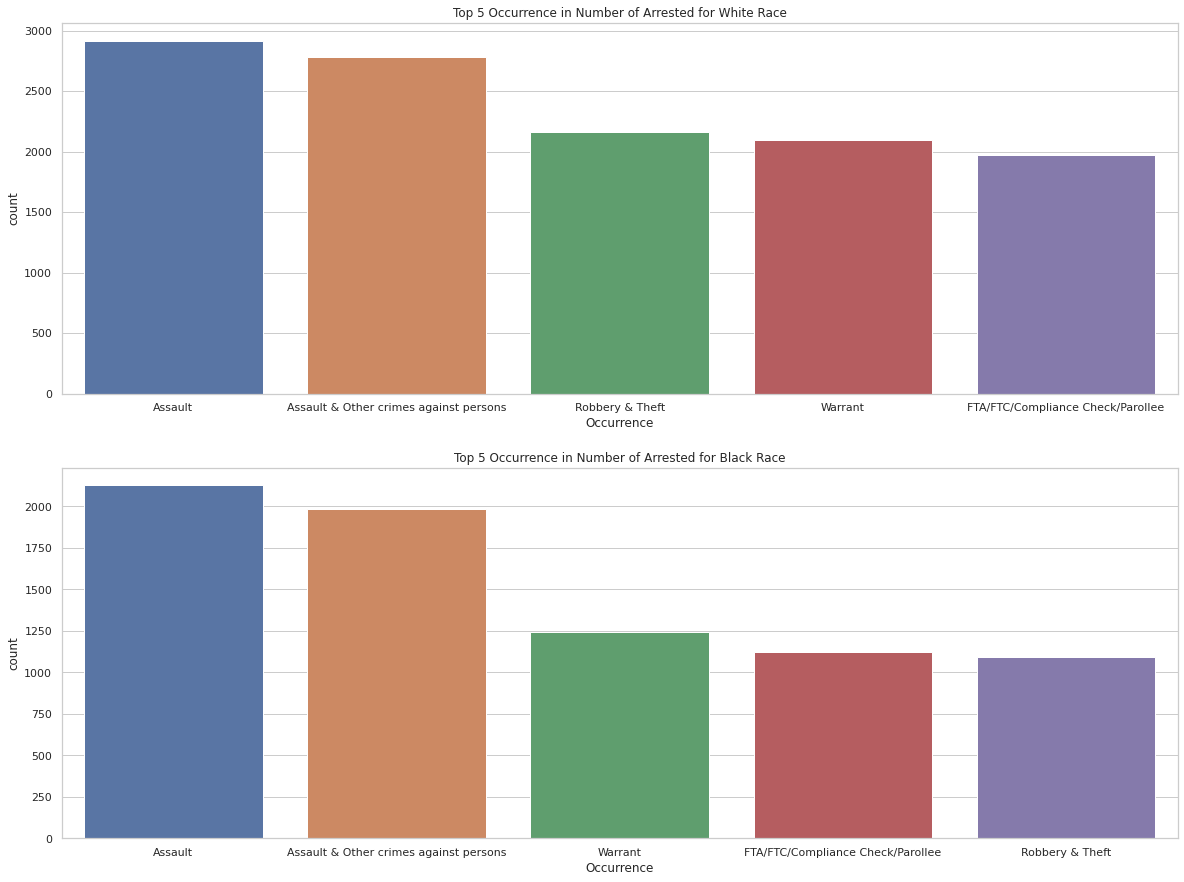

In [23]:
# Top 5 occurrence for White race
white_race_dataset = clean_dataset_ANS[clean_dataset_ANS['Perceived_Race']=='White']
white_occurrence_count = white_race_dataset['Occurrence'].value_counts()
white_occurrence_order = white_occurrence_count.nlargest(5).index.tolist()
filtered_white_occurrence_dataset = white_race_dataset[white_race_dataset['Occurrence'].isin(white_occurrence_order)]

# Top 5 occurrence for Black race
black_race_dataset = clean_dataset_ANS[clean_dataset_ANS['Perceived_Race']=='Black']
black_occurrence_count = black_race_dataset['Occurrence'].value_counts()
black_occurrence_order = black_occurrence_count.nlargest(5).index.tolist()
filtered_black_occurrence_dataset = black_race_dataset[black_race_dataset['Occurrence'].isin(black_occurrence_order)]

#figure
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(2,1, figsize=[20,15])
sns.countplot(data=filtered_white_occurrence_dataset, x='Occurrence', order=white_occurrence_order, ax=ax[0]).set(title='Top 5 Occurrence in Number of Arrested for White Race')
sns.countplot(data=filtered_black_occurrence_dataset, x='Occurrence', order=black_occurrence_order, ax=ax[1]).set(title='Top 5 Occurrence in Number of Arrested for Black Race')

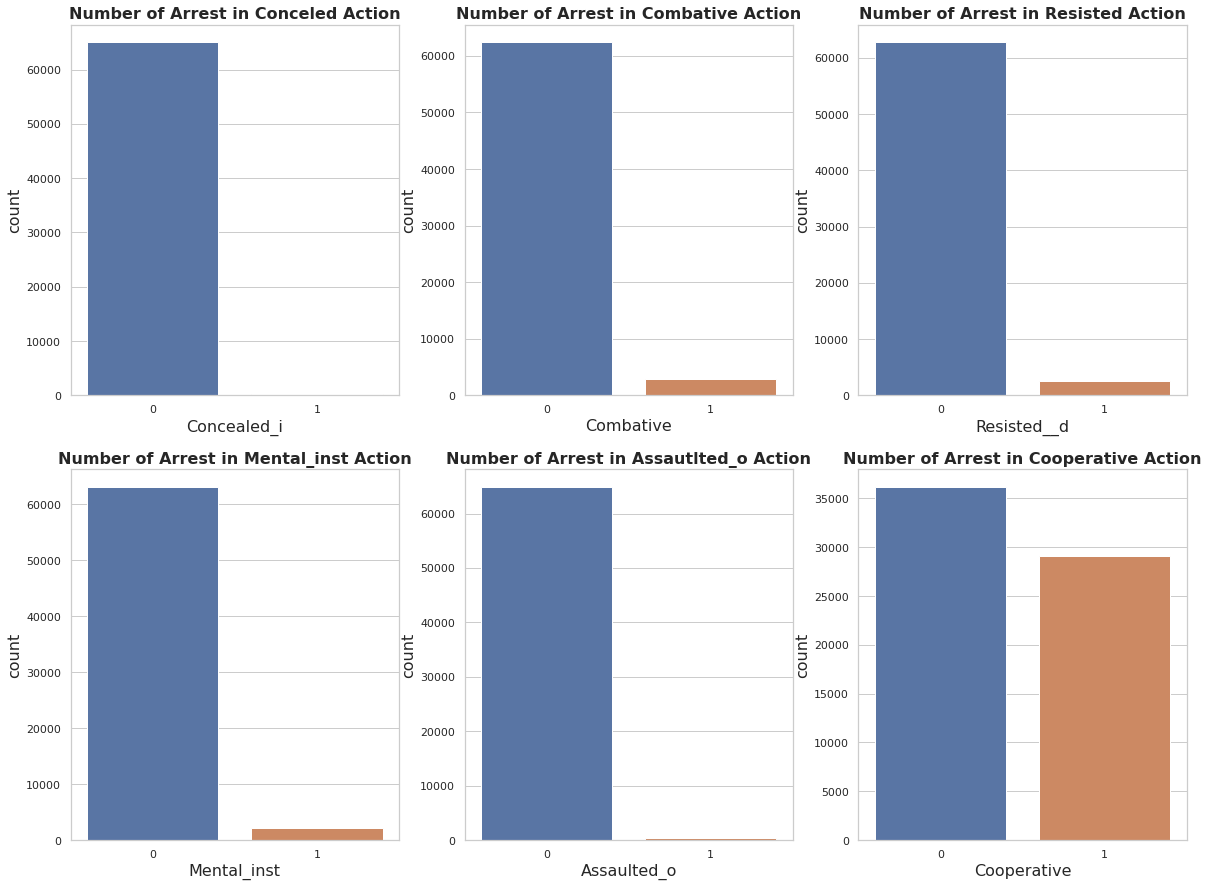

In [24]:
#Action at arrest vs Arrest
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots (2,3, figsize=[20,15])
sns.countplot(x='Concealed_i', data=clean_dataset_ANS, ax=ax[0,0]).set(title='Number of Arrest in Conceled Action')
sns.countplot(x='Combative', data=clean_dataset_ANS, ax=ax[0,1]).set(title='Number of Arrest in Combative Action')
sns.countplot(x='Resisted__d', data=clean_dataset_ANS, ax=ax[0,2]).set(title='Number of Arrest in Resisted Action')
sns.countplot(x='Mental_inst', data=clean_dataset_ANS, ax=ax[1,0]).set(title='Number of Arrest in Mental_inst Action')
sns.countplot(x='Assaulted_o', data=clean_dataset_ANS, ax=ax[1,1]).set(title='Number of Arrest in Assautlted_o Action')
sns.countplot(x='Cooperative', data=clean_dataset_ANS, ax=ax[1,2]).set(title='Number of Arrest in Cooperative Action')

for ax in fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_title(ax.get_title(), fontsize=16, fontweight='bold')

### Strip search & Item Found

[Text(0.5, 1.0, 'Number of Items Found in Strip Search')]

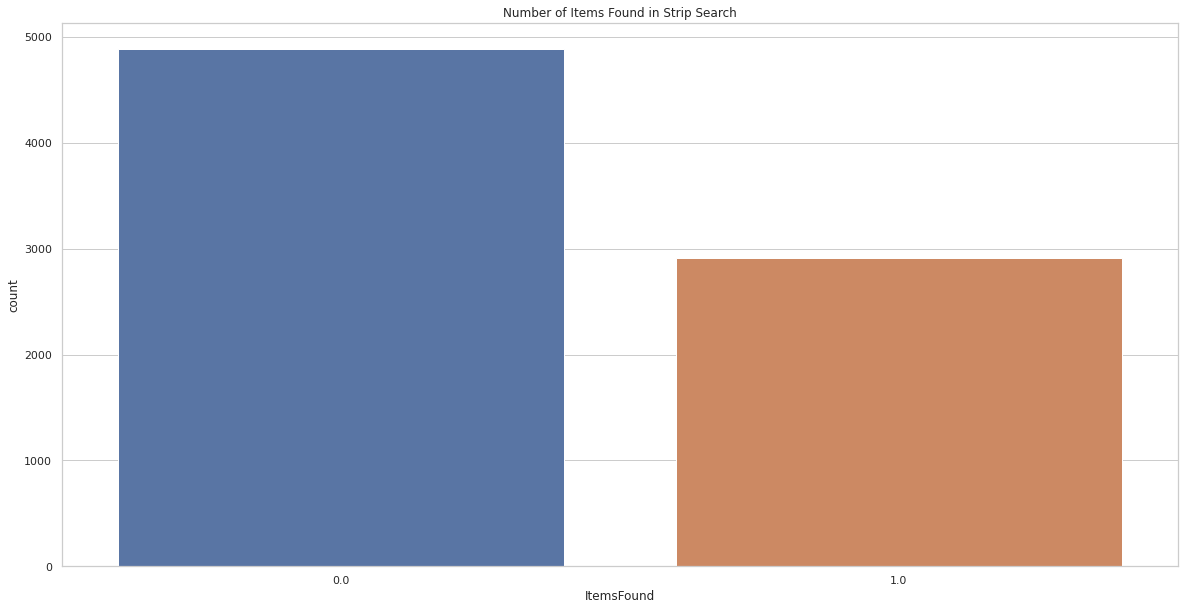

In [25]:
#Strip Search vs Item Found
sns.set_theme(style="whitegrid")
#figure
fig, ax = plt.subplots (figsize=[20,10])
sns.countplot(x='ItemsFound', data=filtered_Stripsearch).set(title='Number of Items Found in Strip Search')

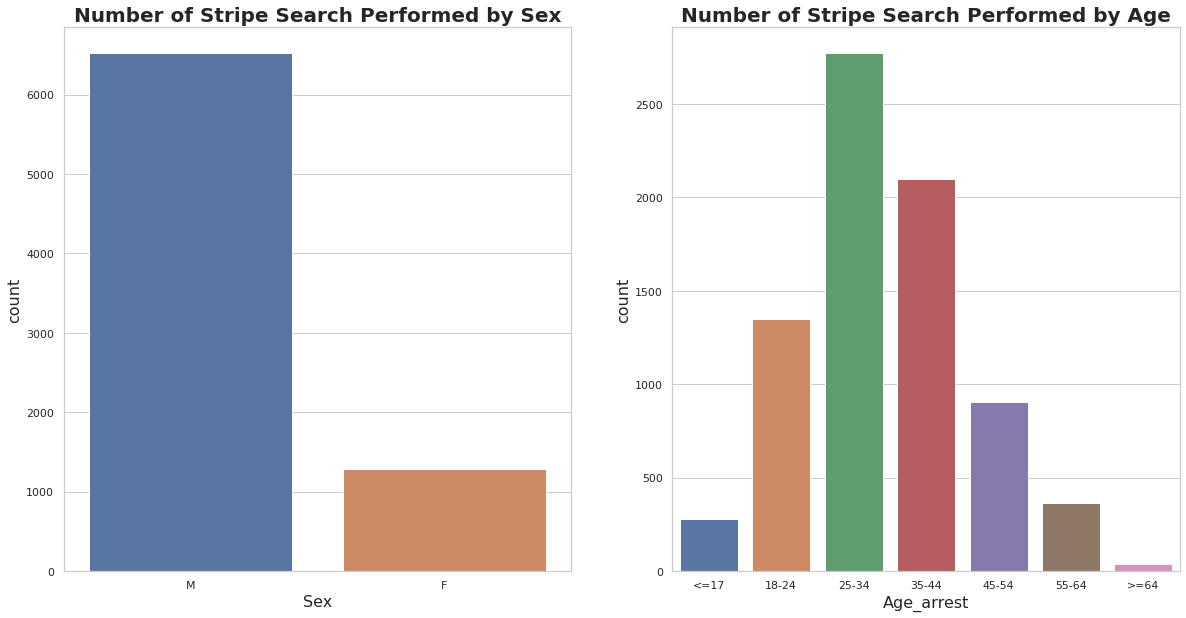

In [26]:
#Sex & Age vs Stripe search
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots (1,2, figsize=[20,10])
sns.countplot(x='Sex', data=filtered_Stripsearch, order=['M', 'F'], ax=ax[0]).set(title='Number of Stripe Search Performed by Sex')
sns.countplot(x='Age_arrest', data=filtered_Stripsearch, order=age_order, ax=ax[1]).set(title='Number of Stripe Search Performed by Age')

for ax in fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_title(ax.get_title(), fontsize=20, fontweight='bold')

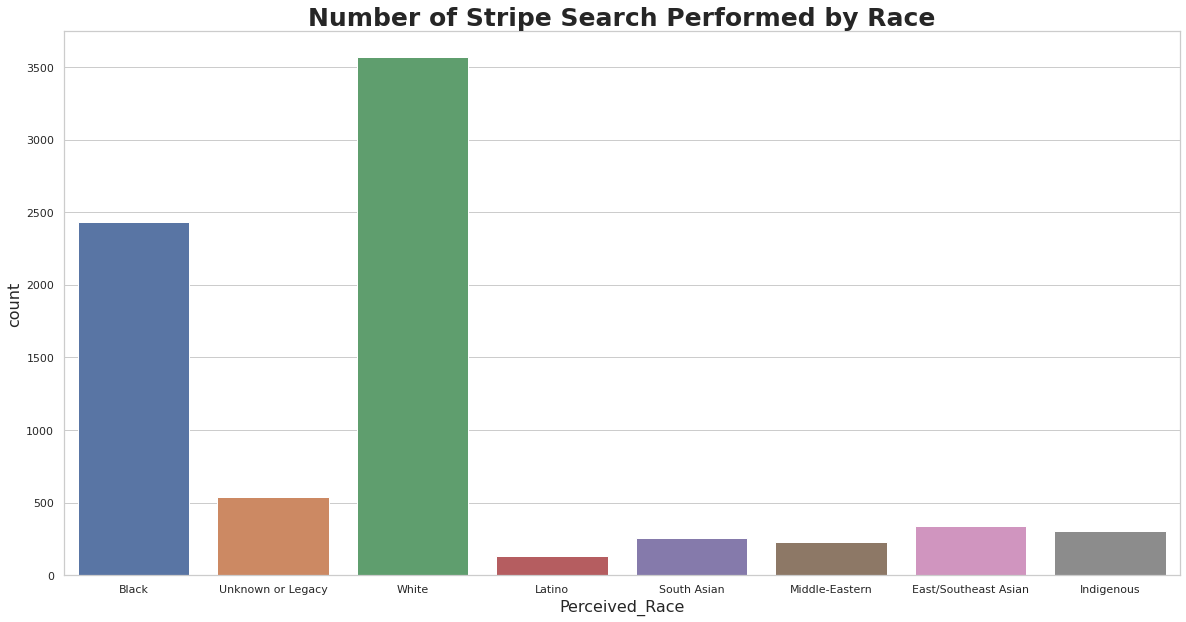

In [27]:
#Race vs Stripe search
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots ( figsize=[20,10])
sns.countplot(x='Perceived_Race', data=filtered_Stripsearch, ax=ax).set(title='Number of Stripe Search Performed by Race')

for ax in fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_title(ax.get_title(), fontsize=25, fontweight='bold')

[Text(0.5, 1.0, 'Items Found among Age')]

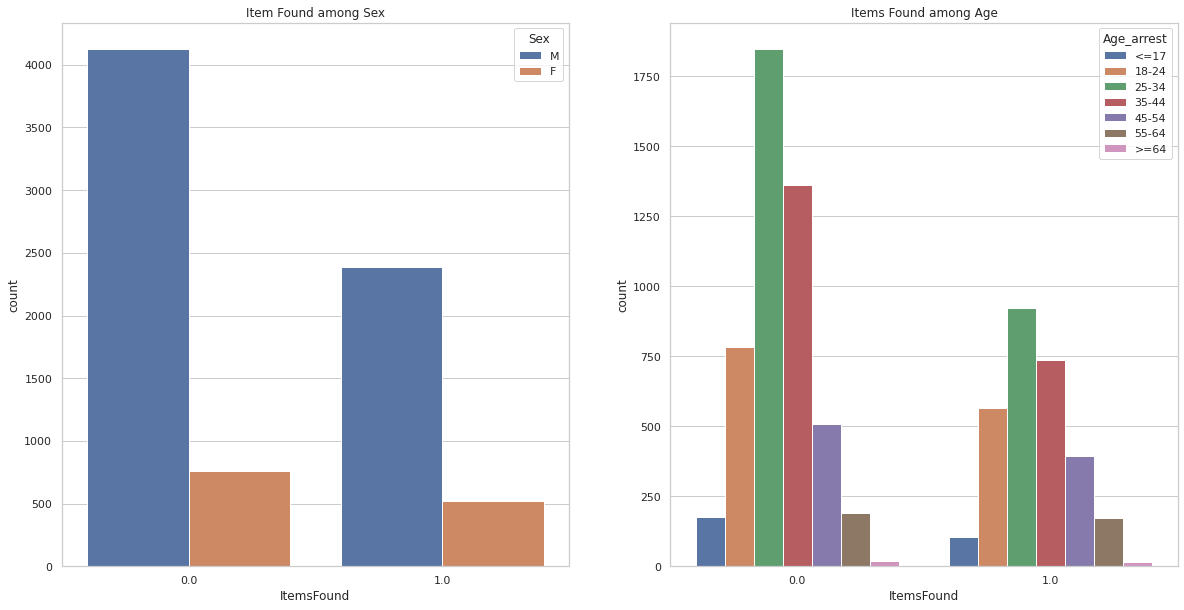

In [28]:
#Sex & Age vs Item Found
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots (1,2, figsize=[20,10])
sns.countplot(x='ItemsFound', hue='Sex', data=filtered_Stripsearch, ax=ax[0]).set(title='Item Found among Sex')
sns.countplot(x='ItemsFound',  hue='Age_arrest', hue_order=age_order, data=filtered_Stripsearch, ax=ax[1]).set(title='Items Found among Age')

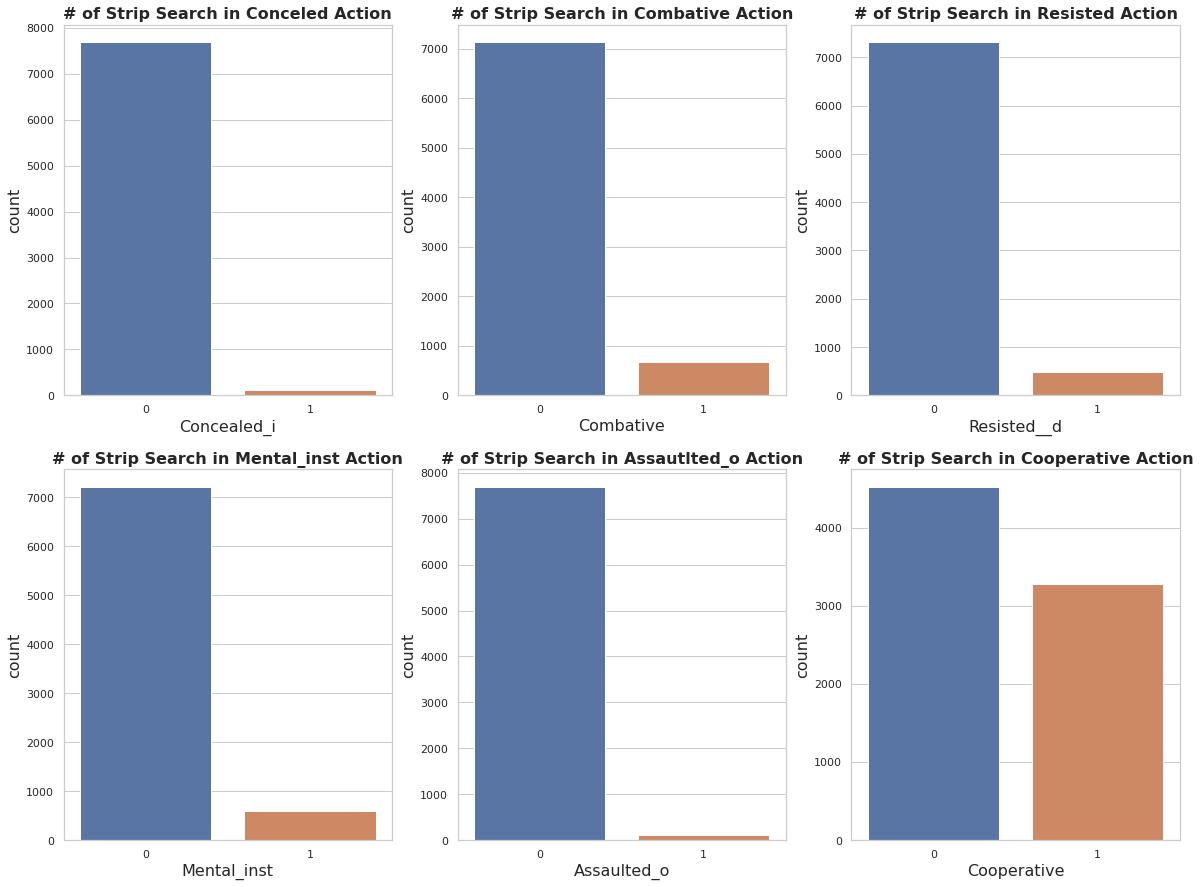

In [29]:
#Action at arrest vs Strip search
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots (2,3, figsize=[20,15])
sns.countplot(x='Concealed_i', data=filtered_Stripsearch, ax=ax[0,0]).set(title='# of Strip Search in Conceled Action')
sns.countplot(x='Combative', data=filtered_Stripsearch, ax=ax[0,1]).set(title='# of Strip Search in Combative Action')
sns.countplot(x='Resisted__d', data=filtered_Stripsearch, ax=ax[0,2]).set(title='# of Strip Search in Resisted Action')
sns.countplot(x='Mental_inst', data=filtered_Stripsearch, ax=ax[1,0]).set(title='# of Strip Search in Mental_inst Action')
sns.countplot(x='Assaulted_o', data=filtered_Stripsearch, ax=ax[1,1]).set(title='# of Strip Search in Assautlted_o Action')
sns.countplot(x='Cooperative', data=filtered_Stripsearch, ax=ax[1,2]).set(title='# of Strip Search in Cooperative Action')

for ax in fig.axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_title(ax.get_title(), fontsize=16, fontweight='bold')

[Text(0.5, 1.0, 'Number of Items Found in Cooperative Action')]

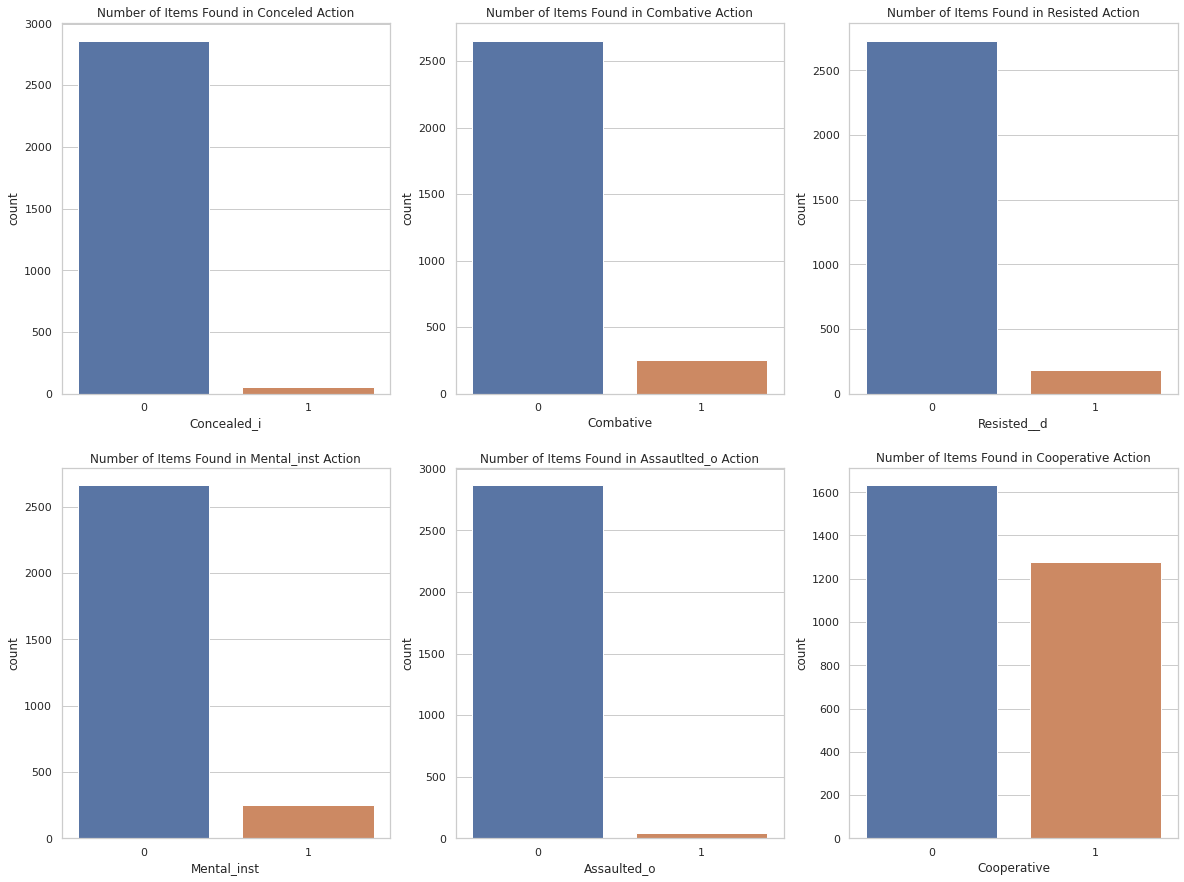

In [30]:
#Action at arrest vs items found
sns.set_theme(style="whitegrid")
#filter items found 
filtered_ItemFound = clean_dataset_ANS[clean_dataset_ANS['ItemsFound'] == 1]
fig, ax = plt.subplots (2,3, figsize=[20,15])
sns.countplot(x='Concealed_i', data=filtered_ItemFound, ax=ax[0,0]).set(title='Number of Items Found in Conceled Action')
sns.countplot(x='Combative', data=filtered_ItemFound, ax=ax[0,1]).set(title='Number of Items Found in Combative Action')
sns.countplot(x='Resisted__d', data=filtered_ItemFound, ax=ax[0,2]).set(title='Number of Items Found in Resisted Action')
sns.countplot(x='Mental_inst', data=filtered_ItemFound, ax=ax[1,0]).set(title='Number of Items Found in Mental_inst Action')
sns.countplot(x='Assaulted_o', data=filtered_ItemFound, ax=ax[1,1]).set(title='Number of Items Found in Assautlted_o Action')
sns.countplot(x='Cooperative', data=filtered_ItemFound, ax=ax[1,2]).set(title='Number of Items Found in Cooperative Action')

## T-tests

With the Visual EDA we did above, we saw some interesting disparities that we would like to confirm with some t-tests. Before every t-test, we will need to prepare the data a little bit. 


Since we need a continuous variable for t-tests and ANOVA, we've decided to keep age as our continuous variable.

**Assumptions:**
1. Since we only have categories of the age, we took the midpoint of them
2. For the lower limit, age was taken as 17.
3. For the upper limit, age was taken as 65  

### Creating a continuous variable

In [31]:
clean_dataset_ANS = (clean_dataset_ANS.replace(to_replace = ["<=17",
                                                             "18-24",
                                                             "25-34",
                                                             "35-44",
                                                             "45-54",
                                                             "55-64",
                                                             ">=64"], 
                                               value=["17",
                                                      "21",
                                                      "30",
                                                      "40",
                                                      "50",
                                                      "60",
                                                      "65"]))
#Converting to float
clean_dataset_ANS['Age_arrest'] = clean_dataset_ANS['Age_arrest'].astype('float')

#Dropping rows with NA values
clean_dataset_ANS = clean_dataset_ANS[clean_dataset_ANS['Age_arrest'].notna()]

In [32]:
len(dataset_ANS) - len(clean_dataset_ANS) 

24

We dropped 24 rows with NA values in the age column

In [33]:
clean_dataset_ANS['Age_arrest'].unique()

array([40., 30., 50., 60., 21., 65., 17.])

In [34]:
clean_dataset_ANS.head(20)

,Arrest_Month,ArrestID,PersonID,Perceived_Race,Sex,Age_arrest,StripSearch,Occurrence,Concealed_i,Combative,Resisted__d,Mental_inst,Assaulted_o,Cooperative,ItemsFound
0,July-Sept,6017884.0,326622,White,M,40.0,0,Assault & Other crimes against persons,0,0,0,0,0,1,NaN
1,July-Sept,6056669.0,326622,White,M,40.0,0,Assault & Other crimes against persons,0,0,0,0,0,0,NaN
2,Oct-Dec,6057065.0,326622,Unknown or Legacy,M,40.0,0,Assault & Other crimes against persons,0,0,0,0,0,0,NaN
3,Jan-Mar,6029059.0,327535,Black,M,30.0,0,Harassment/Threatening,0,0,0,0,0,0,NaN
4,Jan-Mar,6040372.0,327535,South Asian,M,30.0,0,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN
5,Apr-June,6060688.0,327535,South Asian,M,30.0,0,Assault,0,0,0,0,0,1,NaN
6,Jan-Mar,6053833.0,330778,Black,M,30.0,0,Assault,0,0,0,0,0,0,NaN
7,Jan-Mar,6063477.0,330778,Black,M,30.0,0,Robbery/Theft,0,0,0,0,0,1,NaN
8,Jan-Mar,6053929.0,330778,Black,M,30.0,0,Robbery/Theft,0,0,0,0,0,1,NaN
9,Apr-June,6004570.0,330778,Black,M,30.0,0,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN


### Test 1: Gender

In [35]:
clean_dataset_ANS.groupby("Sex")['Age_arrest'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,12609.0,34.955191,11.949541,17.0,30.0,30.0,40.0,65.0
M,52634.0,36.369704,12.390891,17.0,30.0,30.0,40.0,65.0
U,9.0,35.777778,14.838950,21.0,30.0,30.0,40.0,60.0


In [36]:
#Preparing for t-test
df_1 = clean_dataset_ANS[clean_dataset_ANS["Sex"] == "M"]
df_2 = clean_dataset_ANS[clean_dataset_ANS["Sex"] == "F"]

male = df_1['Age_arrest']
female = df_2['Age_arrest']

In [37]:
stats.shapiro(df_1['Age_arrest'])

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9194815158843994, pvalue=0.0)

In [38]:
stats.shapiro(df_2['Age_arrest'])

ShapiroResult(statistic=0.9151195883750916, pvalue=0.0)

In [39]:
#Is there a difference in age at arrest between genders?
welch_ttest(male, female)
print("")
print("Mean age for Males ", male.mean())
print("Mean age for Females ", female.mean())


 Welch's t-test= 11.85299 
 p-value = 0.00000 
 Welch-Satterthwaite Degrees of Freedom= 19627.77979

Mean age for Males  36.36970399361629
Mean age for Females  34.95519073677532


In [40]:
cm = sms.CompareMeans(sms.DescrStatsW(male), sms.DescrStatsW(female))
print('Confidence:',cm.tconfint_diff(usevar='unequal'))

Confidence: (1.1806004062261661, 1.6484261074557724)


### Test 2: Race

In [41]:
clean_dataset_ANS.groupby("Perceived_Race")['Age_arrest'].describe()

,count,mean,std,min,25%,50%,75%,max
Perceived_Race,,,,,,,,
Black,17518.0,32.487384,11.293029,17.0,21.0,30.0,40.0,65.0
East/Southeast Asian,4412.0,36.739801,13.212005,17.0,30.0,30.0,50.0,65.0
Indigenous,1932.0,36.335404,10.430720,17.0,30.0,30.0,40.0,65.0
Latino,1768.0,34.739819,11.489921,17.0,30.0,30.0,40.0,65.0
Middle-Eastern,3237.0,34.081866,12.206851,17.0,21.0,30.0,40.0,65.0
South Asian,3613.0,35.908940,12.594835,17.0,30.0,30.0,40.0,65.0
Unknown or Legacy,5055.0,35.844708,12.439621,17.0,30.0,30.0,40.0,65.0
White,27713.0,38.650705,12.297143,17.0,30.0,40.0,50.0,65.0


In [42]:
#Preparing for t-test
df_1 = clean_dataset_ANS[clean_dataset_ANS["Perceived_Race"] == "White"]
df_2 = clean_dataset_ANS[clean_dataset_ANS["Perceived_Race"] == "Black"]

White = df_1['Age_arrest']
Black = df_2['Age_arrest']

In [43]:
stats.shapiro(df_1['Age_arrest'])

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9280403256416321, pvalue=0.0)

In [44]:
stats.shapiro(df_2['Age_arrest'])

ShapiroResult(statistic=0.8955561518669128, pvalue=0.0)

In [45]:
#Is there a difference in age at arrest between white and black individuals?
welch_ttest(White, Black)
print("")
print("Mean age for White ", White.mean())
print("Mean age for Black ", Black.mean())


 Welch's t-test= 54.61174 
 p-value = 0.00000 
 Welch-Satterthwaite Degrees of Freedom= 39566.34897

Mean age for White  38.65070544509797
Mean age for Black  32.4873844046124


In [46]:
cm = sms.CompareMeans(sms.DescrStatsW(White), sms.DescrStatsW(Black))
print('Confidence:',cm.tconfint_diff(usevar='unequal'))

Confidence: (5.942118485271573, 6.384523595699568)


In [47]:
#Preparing for t-test
df_1 = clean_dataset_ANS[clean_dataset_ANS["Perceived_Race"] == "White"]
df_2 = clean_dataset_ANS[clean_dataset_ANS["Perceived_Race"] == "South Asian"]

White = df_1['Age_arrest']
SouthAsian = df_2['Age_arrest']

In [48]:
stats.shapiro(df_1['Age_arrest'])

ShapiroResult(statistic=0.9280403256416321, pvalue=0.0)

In [49]:
stats.shapiro(df_2['Age_arrest'])

ShapiroResult(statistic=0.9094808101654053, pvalue=5.0222536961401444e-42)

In [50]:
#Is there a difference in age at arrest between white and south asian individuals?
welch_ttest(White, SouthAsian)
print("")
print("Mean age for White ", White.mean())
print("Mean age for South Asian ", SouthAsian.mean())


 Welch's t-test= 12.34054 
 p-value = 0.00000 
 Welch-Satterthwaite Degrees of Freedom= 4556.43024

Mean age for White  38.65070544509797
Mean age for South Asian  35.90893993910878


In [51]:
cm = sms.CompareMeans(sms.DescrStatsW(White), sms.DescrStatsW(SouthAsian))
print('Confidence:',cm.tconfint_diff(usevar='unequal'))

Confidence: (2.306193894140136, 3.1773371178382495)


### Test 3: Occurance

In [52]:
#Preparing for t-test
df_1 = clean_dataset_ANS[clean_dataset_ANS["Occurrence"] == "Assault"]
df_2 = clean_dataset_ANS[clean_dataset_ANS["Occurrence"] == "Robbery/Theft"]

Assault = df_1['Age_arrest']
Rob = df_2['Age_arrest']

#Is there a difference in age at arrest between people who assault and those who rob?
welch_ttest(Assault, Rob)
print("")
print("Mean age for Assault ", Assault.mean())
print("Mean age for Robbery ", Rob.mean())


 Welch's t-test= 0.56022 
 p-value = 0.57534 
 Welch-Satterthwaite Degrees of Freedom= 6690.43149

Mean age for Assault  36.88477472812014
Mean age for Robbery  36.73887556621369


In [53]:
#Preparing for t-test
df_1 = clean_dataset_ANS[clean_dataset_ANS["Occurrence"] == "Assault"]
df_2 = clean_dataset_ANS[clean_dataset_ANS["Occurrence"] == "Warrant"]

Assault = df_1['Age_arrest']
Warrant = df_2['Age_arrest']

#Is there a difference in age at arrest between people who assault and those who rob?
welch_ttest(Assault, Warrant)
print("")
print("Mean age for Assault ", Assault.mean())
print("Mean age for Warrant ", Warrant.mean())


 Welch's t-test= 5.89494 
 p-value = 0.00000 
 Welch-Satterthwaite Degrees of Freedom= 9461.73118

Mean age for Assault  36.88477472812014
Mean age for Warrant  35.58337140246688


### Test 4: Strip Search 

In [54]:
clean_dataset_ANS.groupby("StripSearch")['Age_arrest'].describe()

,count,mean,std,min,25%,50%,75%,max
StripSearch,,,,,,,,
0,57451.0,36.307566,12.477635,17.0,30.0,30.0,40.0,65.0
1,7801.0,34.540315,10.963082,17.0,30.0,30.0,40.0,65.0


In [55]:
#Preparing for t-test
df_1 = clean_dataset_ANS[clean_dataset_ANS["StripSearch"] == 0]
df_2 = clean_dataset_ANS[clean_dataset_ANS["StripSearch"] == 1]

Not_Stripped = df_1['Age_arrest']
Stripped = df_2['Age_arrest']



In [56]:
stats.shapiro(df_1['Age_arrest'])

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9194584488868713, pvalue=0.0)

In [57]:
stats.shapiro(df_2['Age_arrest'])

ShapiroResult(statistic=0.9097580313682556, pvalue=0.0)

In [58]:
#Is there a difference in age at arrest between people who were strip searched and those who were not?
welch_ttest(Not_Stripped, Stripped)
print("")
print("Mean age for Not Stripped ", Not_Stripped.mean())
print("Mean age for Stripped ", Stripped.mean())


 Welch's t-test= 13.12975 
 p-value = 0.00000 
 Welch-Satterthwaite Degrees of Freedom= 10740.15975

Mean age for Not Stripped  36.30756644792954
Mean age for Stripped  34.540315344186645


In [59]:
cm = sms.CompareMeans(sms.DescrStatsW(Not_Stripped), sms.DescrStatsW(Stripped))
print('Confidence:',cm.tconfint_diff(usevar='unequal'))

Confidence: (1.5034122650790336, 2.0310899424067532)


###Test 5: Item Found

In [60]:
#Preparing for t-test
temp = clean_dataset_ANS[clean_dataset_ANS['ItemsFound'].notnull()]

df_1 = temp[temp["ItemsFound"] == 0.0]
df_2 = temp[temp["ItemsFound"] == 1.0]

Not_found = df_1['Age_arrest']
found = df_2['Age_arrest']

#Is there a difference in age at arrest between people who were strip searched and an item was found and those where an item was not found?
welch_ttest(Not_found, found)
print("")
print("Mean age for Item not found ", Not_found.mean())
print("Mean age for Item found ", found.mean())


 Welch's t-test= -2.91903 
 p-value = 0.00353 
 Welch-Satterthwaite Degrees of Freedom= 5603.50859

Mean age for Item not found  34.25316973415133
Mean age for Item found  35.02267262109241


### Test 6: Combative 

In [61]:
clean_dataset_ANS.groupby("Combative")['Age_arrest'].describe()

,count,mean,std,min,25%,50%,75%,max
Combative,,,,,,,,
0,62372.0,36.089030,12.361725,17.0,30.0,30.0,40.0,65.0
1,2880.0,36.253472,11.371234,17.0,30.0,30.0,40.0,65.0


In [62]:
#Preparing for t-test
df_1 = clean_dataset_ANS[clean_dataset_ANS["Combative"] == 0]
df_2 = clean_dataset_ANS[clean_dataset_ANS["Combative"] == 1]

Not_Combative = df_1['Age_arrest']
Combative = df_2['Age_arrest']

In [63]:
stats.shapiro(df_1['Age_arrest'])

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9190507531166077, pvalue=0.0)

In [64]:
stats.shapiro(df_2['Age_arrest'])

ShapiroResult(statistic=0.9114747643470764, pvalue=4.5841332471139045e-38)

In [65]:
#Is there a difference in age at arrest between people who were combative and those who not?
welch_ttest(Not_Combative, Combative)
print("")
print("Mean age for Not Combative ", Not_Combative.mean())
print("Mean age for Combative ", Combative.mean())


 Welch's t-test= -0.75572 
 p-value = 0.44987 
 Welch-Satterthwaite Degrees of Freedom= 3201.34115

Mean age for Not Combative  36.08903033412429
Mean age for Combative  36.25347222222222


In [66]:
cm = sms.CompareMeans(sms.DescrStatsW(Not_Combative), sms.DescrStatsW(Combative))
print('Confidence:',cm.tconfint_diff(usevar='unequal'))

Confidence: (-0.5910814793695754, 0.2621977031737094)


### Test 7: Male and Race

In [67]:
temp = clean_dataset_ANS[clean_dataset_ANS["Sex"] == "M"]

df_1 = temp[temp["Perceived_Race"] == "White"]
df_2 = temp[temp["Perceived_Race"] == "Black"]

White = df_1['Age_arrest']
Black = df_2['Age_arrest']

#Is there a difference in age at arrest between male white and black individuals?
welch_ttest(White, Black)
print("")
print("Mean age for Male White ", White.mean())
print("Mean age for Male Black ", Black.mean())



 Welch's t-test= 50.90662 
 p-value = 0.00000 
 Welch-Satterthwaite Degrees of Freedom= 32836.81035

Mean age for Male White  39.18453541260559
Mean age for Male Black  32.752705217451236


### Test 8: Female and Strip Searched

In [68]:
temp = clean_dataset_ANS[clean_dataset_ANS["Sex"] == "F"]

df_1 = temp[temp["StripSearch"] == 0]
df_2 = temp[temp["StripSearch"] == 1]

Not_Stripped = df_1['Age_arrest']
Stripped = df_2['Age_arrest']

In [69]:
temp.groupby("StripSearch")['Age_arrest'].describe()

,count,mean,std,min,25%,50%,75%,max
StripSearch,,,,,,,,
0,11326.0,35.085467,12.154449,17.0,30.0,30.0,40.0,65.0
1,1283.0,33.805144,9.889297,17.0,30.0,30.0,40.0,65.0


In [70]:
stats.shapiro(df_1['Age_arrest'])

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9161362648010254, pvalue=0.0)

In [71]:
stats.shapiro(df_2['Age_arrest'])

ShapiroResult(statistic=0.898289144039154, pvalue=2.4845801100132665e-28)

In [72]:
#Is there a difference in age at arrest between females who were strip searched and those who were not?
welch_ttest(Not_Stripped, Stripped)
print("")
print("Mean age for Females Not Stripped ", Not_Stripped.mean())
print("Mean age for Females Stripped ", Stripped.mean())


 Welch's t-test= 4.28516 
 p-value = 0.00002 
 Welch-Satterthwaite Degrees of Freedom= 1752.46956

Mean age for Females Not Stripped  35.08546706692566
Mean age for Females Stripped  33.80514419329696


In [73]:
cm = sms.CompareMeans(sms.DescrStatsW(Not_Stripped), sms.DescrStatsW(Stripped))
print('Confidence:',cm.tconfint_diff(usevar='unequal'))

Confidence: (0.6943194823698258, 1.8663262648875707)


### Test 9: Male and Item Found

In [74]:
#Preparing for t-test
temp = clean_dataset_ANS[clean_dataset_ANS['ItemsFound'].notnull()]
temp = temp[temp["Sex"] == "M"]

df_1 = temp[temp["ItemsFound"] == 0.0]
df_2 = temp[temp["ItemsFound"] == 1.0]

Not_found = df_1['Age_arrest']
Found = df_2['Age_arrest']

#Is there a difference in age at arrest between males who were strip searched and an item was found and those where an item was not found?
welch_ttest(Not_found, found)
print("")
print("Mean age for Males with Item not found ", Not_found.mean())
print("Mean age for Males with Item found ", Found.mean())


 Welch's t-test= -2.41923 
 p-value = 0.01558 
 Welch-Satterthwaite Degrees of Freedom= 5886.36676

Mean age for Males with Item not found  34.36279970937273
Mean age for Males with Item found  35.24194223524487


###Test 10: Black and Gender 

In [75]:
temp = clean_dataset_ANS[clean_dataset_ANS["Perceived_Race"] == "Black"]

df_1 = temp[temp["Sex"] == "M"]
df_2 = temp[temp["Sex"] == "F"]

Male = df_1['Age_arrest']
Female = df_2['Age_arrest']

In [76]:
temp.groupby("Sex")['Age_arrest'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,3009.0,31.208043,10.942545,17.0,21.0,30.0,40.0,65.0
M,14509.0,32.752705,11.346683,17.0,21.0,30.0,40.0,65.0


In [77]:
stats.shapiro(df_1['Age_arrest'])

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8956495523452759, pvalue=0.0)

In [78]:
stats.shapiro(df_2['Age_arrest'])

ShapiroResult(statistic=0.8920734524726868, pvalue=1.0537764451722624e-41)

In [79]:
#Is there a difference in age at arrest between male and female black individuals?
welch_ttest(Male, Female)
print("")
print("Mean age for Black males ", Male.mean())
print("Mean age for Black females ", Female.mean())


 Welch's t-test= 7.00188 
 p-value = 0.00000 
 Welch-Satterthwaite Degrees of Freedom= 4453.17083

Mean age for Black males  32.752705217451236
Mean age for Black females  31.20804253904952


In [80]:
cm = sms.CompareMeans(sms.DescrStatsW(Male), sms.DescrStatsW(Female))
print('Confidence:',cm.tconfint_diff(usevar='unequal'))

Confidence: (1.1121639024665262, 1.9771614543369092)


###Test 11: White, Male and Assault/Robbery

In [81]:
temp = clean_dataset_ANS[clean_dataset_ANS["Perceived_Race"] == "White"]
temp = temp[temp["Sex"] == "M"]

df_1 = temp[temp["Occurrence"] == "Assault"]
df_2 = temp[temp["Occurrence"] == "Robbery/Theft"]

Assault = df_1['Age_arrest']
Rob = df_2['Age_arrest']

#Is there a difference in age at arrest between people who assault and those who rob?
welch_ttest(Assault, Rob)
print("")
print("Mean age for White Males who Assaulted ", Assault.mean())
print("Mean age for White Males who Robbed ", Rob.mean())



 Welch's t-test= -0.47071 
 p-value = 0.63789 
 Welch-Satterthwaite Degrees of Freedom= 2411.53872

Mean age for White Males who Assaulted  39.62544169611307
Mean age for White Males who Robbed  39.83658536585366


### Test 12: Black, Female, Strip Searched

In [82]:
temp = clean_dataset_ANS[clean_dataset_ANS["Perceived_Race"] == "Black"]
temp = temp[temp["Sex"] == "F"]

df_1 = clean_dataset_ANS[clean_dataset_ANS["StripSearch"] == 0]
df_2 = clean_dataset_ANS[clean_dataset_ANS["StripSearch"] == 1]

Not_Stripped = df_1['Age_arrest']
Stripped = df_2['Age_arrest']

#Is there a difference in age at arrest between females who were strip searched and those who were not?
welch_ttest(Not_Stripped, Stripped)
print("")
print("Mean age for Black Females Not Stripped ", Not_Stripped.mean())
print("Mean age for Black Females Stripped ", Stripped.mean())


 Welch's t-test= 13.12975 
 p-value = 0.00000 
 Welch-Satterthwaite Degrees of Freedom= 10740.15975

Mean age for Black Females Not Stripped  36.30756644792954
Mean age for Black Females Stripped  34.540315344186645


#Chapter 2: One-way and Two-way ANOVA

## One-way ANOVA

Here we will do one-way ANOVA of categorical variables with more than two groups. 

In [83]:
clean_dataset_ANS.head(15)

,Arrest_Month,ArrestID,PersonID,Perceived_Race,Sex,Age_arrest,StripSearch,Occurrence,Concealed_i,Combative,Resisted__d,Mental_inst,Assaulted_o,Cooperative,ItemsFound
0,July-Sept,6017884.0,326622,White,M,40.0,0,Assault & Other crimes against persons,0,0,0,0,0,1,NaN
1,July-Sept,6056669.0,326622,White,M,40.0,0,Assault & Other crimes against persons,0,0,0,0,0,0,NaN
2,Oct-Dec,6057065.0,326622,Unknown or Legacy,M,40.0,0,Assault & Other crimes against persons,0,0,0,0,0,0,NaN
3,Jan-Mar,6029059.0,327535,Black,M,30.0,0,Harassment/Threatening,0,0,0,0,0,0,NaN
4,Jan-Mar,6040372.0,327535,South Asian,M,30.0,0,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN
5,Apr-June,6060688.0,327535,South Asian,M,30.0,0,Assault,0,0,0,0,0,1,NaN
6,Jan-Mar,6053833.0,330778,Black,M,30.0,0,Assault,0,0,0,0,0,0,NaN
7,Jan-Mar,6063477.0,330778,Black,M,30.0,0,Robbery/Theft,0,0,0,0,0,1,NaN
8,Jan-Mar,6053929.0,330778,Black,M,30.0,0,Robbery/Theft,0,0,0,0,0,1,NaN
9,Apr-June,6004570.0,330778,Black,M,30.0,0,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN


In [84]:
df = clean_dataset_ANS

df['Perceived_Race'].unique()

array(['White', 'Unknown or Legacy', 'Black', 'South Asian', 'Indigenous',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian', nan],
      dtype=object)

### 1. Sex and Arrest Age

In [85]:
stats.f_oneway(df['Age_arrest'][df['Sex'] == 'M'],
               df['Age_arrest'][df['Sex'] == 'F'],
               df['Age_arrest'][df['Sex'] == 'U'])

F_onewayResult(statistic=67.1892577334483, pvalue=7.080803722760836e-30)

In [86]:
tukey = pairwise_tukeyhsd(endog=df['Age_arrest'],
                          groups=df['Sex'],
                          alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     F      M   1.4145 0.001   1.1285 1.7005   True
     F      U   0.8226   0.9  -8.7959 10.441  False
     M      U  -0.5919   0.9 -10.2078 9.0239  False
---------------------------------------------------


### 2. Race and Arrest Age

In [87]:
df['Perceived_Race'].unique()

array(['White', 'Unknown or Legacy', 'Black', 'South Asian', 'Indigenous',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian', nan],
      dtype=object)

In [88]:
#We are going to drop rows with na values
df = clean_dataset_ANS[clean_dataset_ANS['Perceived_Race'].notnull()]

In [89]:
df['Perceived_Race'].unique()
#Nans are now gone!

array(['White', 'Unknown or Legacy', 'Black', 'South Asian', 'Indigenous',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian'], dtype=object)

In [90]:
stats.f_oneway(df['Age_arrest'][df['Perceived_Race'] == 'White'],
               df['Age_arrest'][df['Perceived_Race'] == 'Black'],
               df['Age_arrest'][df['Perceived_Race'] == 'South Asian'],
               df['Age_arrest'][df['Perceived_Race'] == 'Unknown or Legacy'],
               df['Age_arrest'][df['Perceived_Race'] == 'Indigenous'],
               df['Age_arrest'][df['Perceived_Race'] == 'Middle-Eastern'],
               df['Age_arrest'][df['Perceived_Race'] == 'Latino'],
               df['Age_arrest'][df['Perceived_Race'] == 'East/Southeast Asian'])

F_onewayResult(statistic=420.7542639125461, pvalue=0.0)

In [91]:
tukey = pairwise_tukeyhsd(endog=df['Age_arrest'],
                          groups=df['Perceived_Race'],
                          alpha=0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian   4.2524  0.001  3.6371  4.8677   True
               Black           Indigenous    3.848  0.001  2.9724  4.7237   True
               Black               Latino   2.2524  0.001  1.3409  3.1639   True
               Black       Middle-Eastern   1.5945  0.001  0.8957  2.2933   True
               Black          South Asian   3.4216  0.001  2.7541   4.089   True
               Black    Unknown or Legacy   3.3573  0.001  2.7741  3.9405   True
               Black                White   6.1633  0.001  5.8107  6.5159   True
East/Southeast Asian           Indigenous  -0.4044    0.9 -1.4009  0.5921  False
East/Southeast Asian               Latino     -2.0  0.001 -3.0281 -0.9718   True
East/Southeast Asian       M

In [92]:
#export result to csv
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], 
                        columns=tukey._results_table.data[0])
tukey_df.to_excel('tukeyresult.xlsx', index=False)

## Two-way ANOVA

Here we are going to explore some of the combintations of categorical variables like we discussed in our research questions. 

In [93]:
df.head(15)

,Arrest_Month,ArrestID,PersonID,Perceived_Race,Sex,Age_arrest,StripSearch,Occurrence,Concealed_i,Combative,Resisted__d,Mental_inst,Assaulted_o,Cooperative,ItemsFound
0,July-Sept,6017884.0,326622,White,M,40.0,0,Assault & Other crimes against persons,0,0,0,0,0,1,NaN
1,July-Sept,6056669.0,326622,White,M,40.0,0,Assault & Other crimes against persons,0,0,0,0,0,0,NaN
2,Oct-Dec,6057065.0,326622,Unknown or Legacy,M,40.0,0,Assault & Other crimes against persons,0,0,0,0,0,0,NaN
3,Jan-Mar,6029059.0,327535,Black,M,30.0,0,Harassment/Threatening,0,0,0,0,0,0,NaN
4,Jan-Mar,6040372.0,327535,South Asian,M,30.0,0,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN
5,Apr-June,6060688.0,327535,South Asian,M,30.0,0,Assault,0,0,0,0,0,1,NaN
6,Jan-Mar,6053833.0,330778,Black,M,30.0,0,Assault,0,0,0,0,0,0,NaN
7,Jan-Mar,6063477.0,330778,Black,M,30.0,0,Robbery/Theft,0,0,0,0,0,1,NaN
8,Jan-Mar,6053929.0,330778,Black,M,30.0,0,Robbery/Theft,0,0,0,0,0,1,NaN
9,Apr-June,6004570.0,330778,Black,M,30.0,0,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN


In [94]:
df['StripSearch'].unique()

array([0, 1])

In [95]:
model = ols('Age_arrest ~ C(Perceived_Race) + C(StripSearch) + C(Perceived_Race):C(StripSearch)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),4.271663e+05,7.0,421.118642,0.000000e+00
C(StripSearch),2.087605e+04,1.0,144.063469,3.729795e-33
C(Perceived_Race):C(StripSearch),1.603228e+03,7.0,1.580531,1.358859e-01
Residual,9.452684e+06,65232.0,NaN,NaN


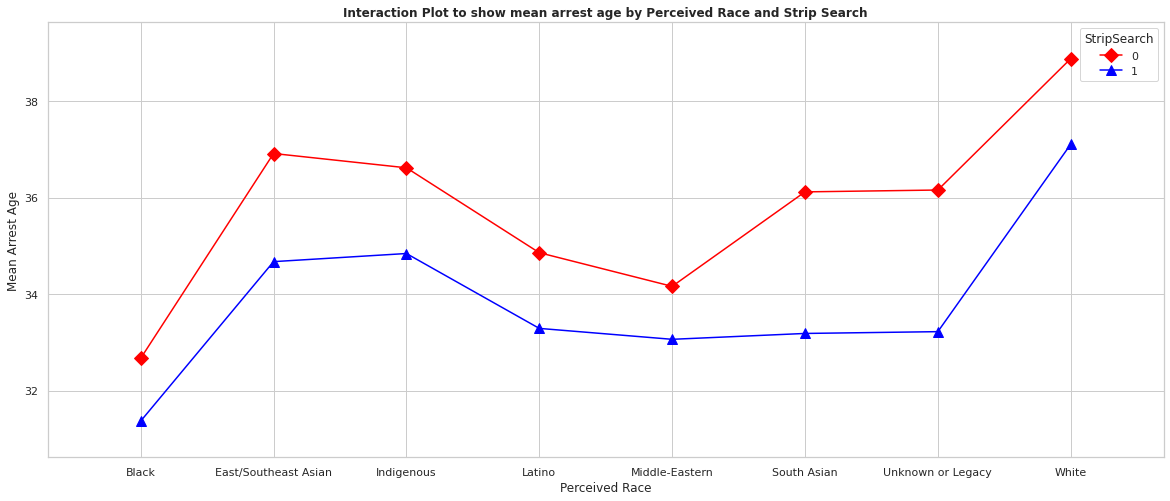

In [96]:
fig, ax = plt.subplots(figsize=(20, 8))

fig = interaction_plot(x = df.Perceived_Race, trace = df.StripSearch, response = df.Age_arrest,
             colors=['red','blue'], markers=['D','^'], ms=10, ax=ax)

plt.ylabel('Mean Arrest Age')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show mean arrest age by Perceived Race and Strip Search', fontweight='bold')
plt.show()

In [97]:
df['ItemsFound'].unique()

array([nan,  0.,  1.])

In [98]:
#Race and Item Found

model = ols('Age_arrest ~ C(ItemsFound) + C(Perceived_Race) + C(ItemsFound):C(Perceived_Race)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(ItemsFound),1039.281058,1.0,9.151878,2.492741e-03
C(Perceived_Race),50047.351395,7.0,62.959352,1.558830e-88
C(ItemsFound):C(Perceived_Race),2368.891437,7.0,2.980055,4.015618e-03
Residual,883945.803831,7784.0,NaN,NaN


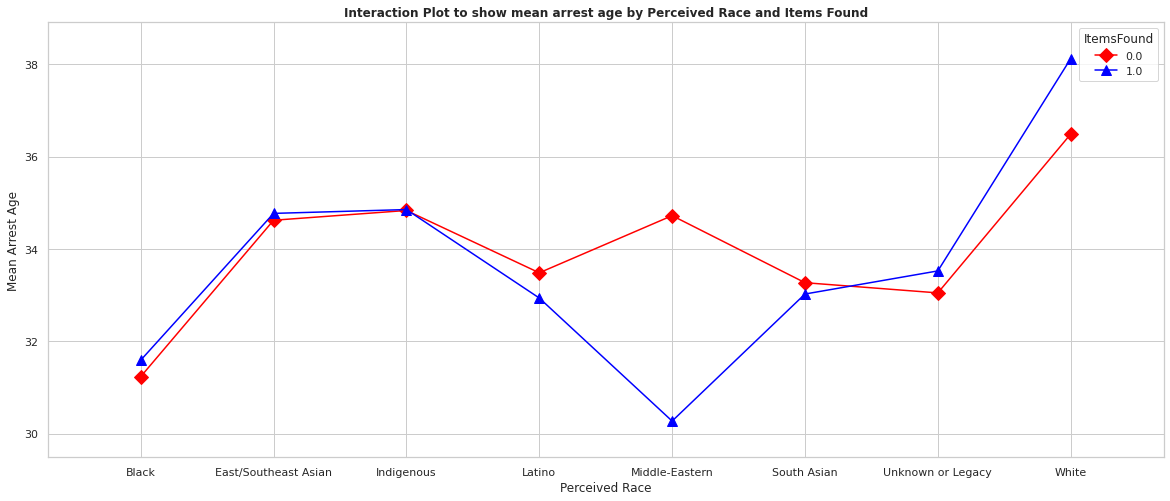

In [99]:
fig, ax = plt.subplots(figsize=(20, 8))

fig = interaction_plot(x = df.Perceived_Race, trace = df.ItemsFound, response = df.Age_arrest,
             colors=['red','blue'], markers=['D','^'], ms=10, ax=ax)

plt.ylabel('Mean Arrest Age')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show mean arrest age by Perceived Race and Items Found', fontweight='bold')
plt.show()

In [100]:
#Race and Combative
model = ols('Age_arrest ~ C(Combative) + C(Perceived_Race) + C(Combative):C(Perceived_Race)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Combative),8.140378e+01,1.0,0.560476,0.454071
C(Perceived_Race),4.277662e+05,7.0,420.747034,0.000000
C(Combative):C(Perceived_Race),7.623885e+02,7.0,0.749879,0.629588
Residual,9.474319e+06,65232.0,NaN,NaN


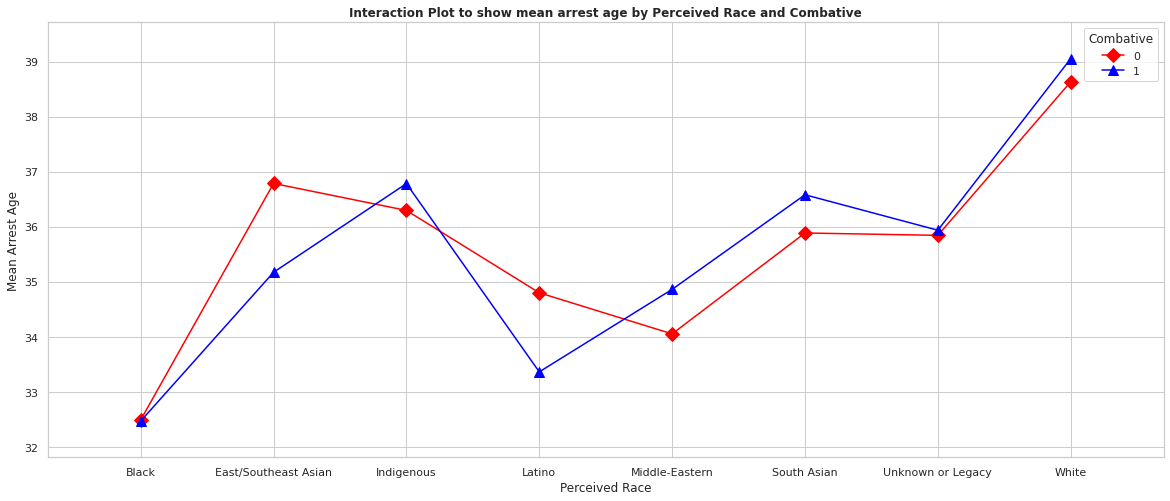

In [101]:
fig, ax = plt.subplots(figsize=(20, 8))

fig = interaction_plot(x = df.Perceived_Race, trace = df.Combative, response = df.Age_arrest,
             colors=['red','blue'], markers=['D','^'], ms=10, ax=ax)

plt.ylabel('Mean Arrest Age')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show mean arrest age by Perceived Race and Combative', fontweight='bold')
plt.show()

In [102]:
#Race and Cooperative
model = ols('Age_arrest ~ C(Cooperative) + C(Perceived_Race) + C(Cooperative):C(Perceived_Race)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Cooperative),1.260209e+03,1.0,8.678276,0.003221
C(Perceived_Race),4.271325e+05,7.0,420.199326,0.000000
C(Cooperative):C(Perceived_Race),1.287405e+03,7.0,1.266508,0.262473
Residual,9.472616e+06,65232.0,NaN,NaN


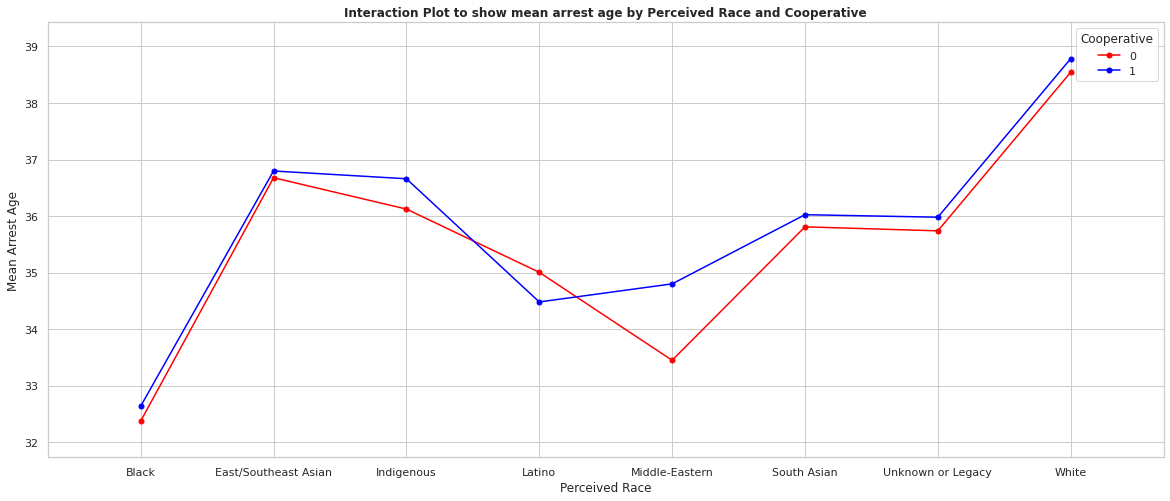

In [103]:
fig, ax = plt.subplots(figsize=(20, 8))

fig = interaction_plot(x = df.Perceived_Race, trace = df.Cooperative, response = df.Age_arrest,
             colors=['red','blue'], ms=10, ax=ax)

plt.ylabel('Mean Arrest Age')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show mean arrest age by Perceived Race and Cooperative', fontweight='bold')
plt.show()

In [104]:
#Sex & Race
model = ols('Age_arrest ~ C(Sex) + C(Perceived_Race) + C(Perceived_Race):C(Sex)', data=df).fit()
sm.stats.anova_lm(model, typ=2)


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Sex),1.680243e+04,2.0,58.074505,6.323990e-26
C(Perceived_Race),8.625947e+05,7.0,851.828477,0.000000e+00
C(Perceived_Race):C(Sex),7.049041e+03,14.0,3.480530,1.351639e-04
Residual,9.436204e+06,65229.0,NaN,NaN


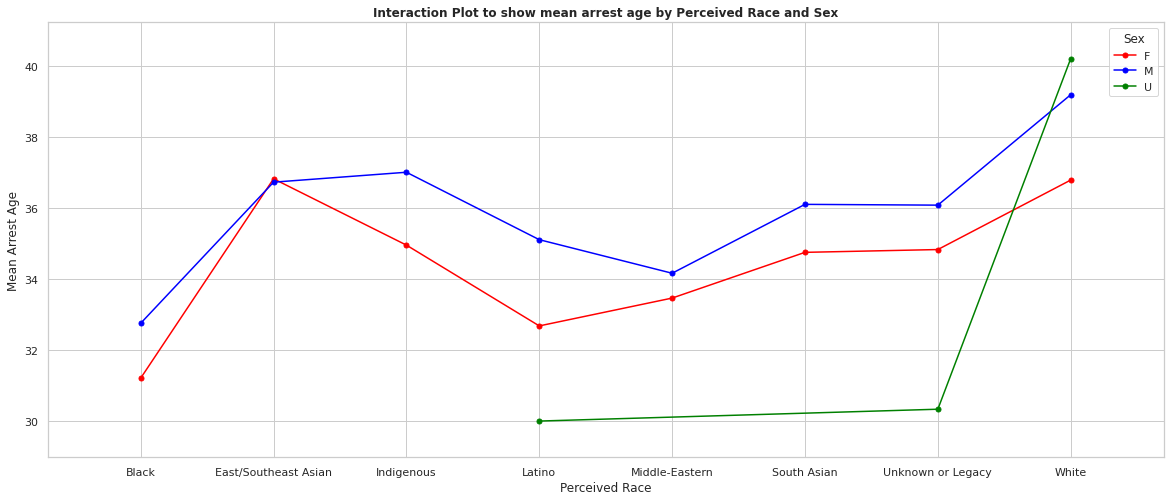

In [105]:
fig, ax = plt.subplots(figsize=(20, 8))

fig = interaction_plot(x = df.Perceived_Race, trace = df.Sex, response = df.Age_arrest,
             colors=['red','blue', 'green'], ms=10, ax=ax)

plt.ylabel('Mean Arrest Age')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show mean arrest age by Perceived Race and Sex', fontweight='bold')
plt.show()